# Introducción a la Ciencia de Datos con Python

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import pandas as pd

In [43]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
a = x * 2
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [59]:
e = np.random.normal(0 , 1, 10)
e

array([ 0.13743188,  0.19995685, -1.93650154, -1.35152612, -2.04301558,
        2.07905842, -1.12860756,  0.65668634,  0.25678217, -0.28699353])

In [60]:
y = a + e
y

array([ 0.13743188,  2.19995685,  2.06349846,  4.64847388,  5.95698442,
       12.07905842, 10.87139244, 14.65668634, 16.25678217, 17.71300647])

In [61]:
data = np.vstack((x,y))
data

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ],
       [ 0.13743188,  2.19995685,  2.06349846,  4.64847388,  5.95698442,
        12.07905842, 10.87139244, 14.65668634, 16.25678217, 17.71300647]])

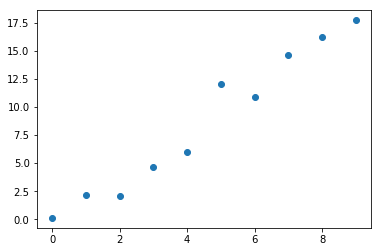

In [62]:
plt.scatter(data[0],data[1])

In [64]:
def linear_function(x,m,c):
    return m * x + c

In [74]:
model = scipy.optimize.curve_fit(linear_function,data[0],data[1])
model

(array([ 2.08687708, -0.73261971]), array([[ 0.02150779, -0.09678503],
        [-0.09678503,  0.61297189]]))

In [71]:
linear_function_vectorized = np.vectorize(linear_function)

In [77]:
y_hat = linear_function_vectorized(x,model[0][0],model[0][1])
y_hat

array([-0.73261971,  1.35425737,  3.44113444,  5.52801152,  7.6148886 ,
        9.70176567, 11.78864275, 13.87551983, 15.9623969 , 18.04927398])

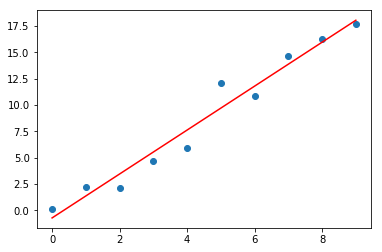

In [84]:
plt.scatter(data[0],data[1])
plt.plot(y_hat, color="red")
plt.show()

In [85]:
loss = y - y_hat
loss

array([ 0.87005159,  0.84569949, -1.37763598, -0.87953764, -1.65790417,
        2.37729275, -0.91725031,  0.78116652,  0.29438527, -0.33626751])

In [88]:
abs_loss = np.abs(loss)
abs_loss

array([0.87005159, 0.84569949, 1.37763598, 0.87953764, 1.65790417,
       2.37729275, 0.91725031, 0.78116652, 0.29438527, 0.33626751])

In [89]:
abs_loss.mean()

1.0337191227483653

In [91]:
titanic = pd.read_csv("data/titanic.csv")
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [112]:
grouped_titanic = titanic[["Pclass","Fare"]].groupby(by = "Pclass")
grouped_titanic.agg("mean")

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.707707


In [113]:
values_per_class = {col_name:col for col_name, col in grouped_titanic["Fare"]}

In [114]:
scipy.stats.f_oneway(*values_per_class.values())

F_onewayResult(statistic=240.66041792910025, pvalue=3.6153954125446083e-84)

In [121]:
contingency_table = pd.crosstab(titanic.Pclass,titanic.Survived)
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


In [118]:
scipy.stats.chi2_contingency(contingency_table)

(101.21674250560609,
 1.0496962042983216e-22,
 2,
 array([[132.71702368,  83.28297632],
        [113.05524239,  70.94475761],
        [299.22773393, 187.77226607]]))